# Credit status of customers

# Context
Attached is a ‘credit’ dataset having information about loan repayment and credit status of customers of a bank.
Customers have been categorised as ‘good’ and ‘bad’, based on their NPA_Status (non-performing asset status).



# Target
1. Check the data for outliers and missing values and where found, treat them appropriately.
2. Prepare the data for model building.
3. Decide on the appropriate algorithm to segment the good and bad customers correctly so that required strategies can be built on them.


# Import the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
from sklearn.feature_selection import chi2
from imblearn.combine import SMOTETomek 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [3]:
import warnings
warnings.filterwarnings("ignore")


# Read the DataSet into a DataFrame

In [4]:
df = pd.read_csv("D:/creditcard.csv")

In [5]:
df.head(3)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good


In [6]:
df.tail(3)

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good
150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good,NaN
150001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad,NaN


In [7]:
df.shape

(150002, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [9]:
df.describe()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,6.670221e+03,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387
std,0.249746,249.755371,14.771866,1.438467e+04,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,3.400000e+03,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,5.400000e+03,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.559046,63.000000,8.249000e+03,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,109.000000,3.008750e+06,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


In [10]:
df.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

# Missing Values
We can use seaborn to create a simple heatmap to see where we are missing data

<AxesSubplot:>

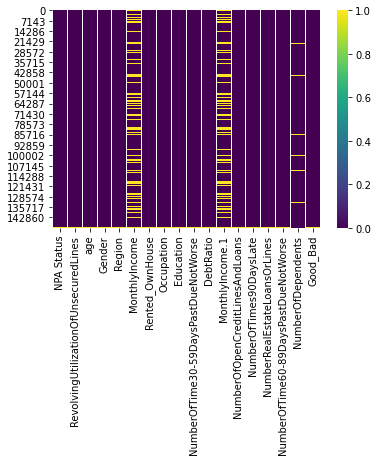

In [11]:
sns.heatmap(df.isnull(),cmap="viridis")

In [12]:
df.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

# Filling Null Values

In DataSet, it's clearly seen that row_id_no. 150000 and 150001 of all variables have null values, so we are easily drop this Id's

In [13]:
df=df.drop([150000,150001])

In [14]:
df.tail()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149995,0.0,0.040674,74.0,Male,North,2100.0,Ownhouse,Non-officer,Professional,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0,Good
149996,0.0,0.299745,44.0,Male,North,5584.0,Ownhouse,Self_Emp,Professional,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2,Good
149997,0.0,0.246044,58.0,Male,North,NaN,Rented,Officer2,Professional,0.0,3870.000000,NaN,18.0,0.0,1.0,0.0,0,Good
149998,0.0,0.000000,30.0,Male,North,5716.0,Rented,Non-officer,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,Good
149999,0.0,0.850283,64.0,Male,North,8158.0,Ownhouse,Self_Emp,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,Good


After getting "Mean", Median","Standard Deviation", which value will greater,we will fill with that value in numerical variables, but in categorical variables we will fill with "Mode".

In [15]:
print("mean of MonthlyIncome:", df["MonthlyIncome"].mean())
print("median of MonthlyIncome:", df["MonthlyIncome"].median())
print("std of MonthlyIncome:", df["MonthlyIncome"].std())
df["MonthlyIncome"]=df["MonthlyIncome"].fillna(df["MonthlyIncome"].std())

mean of MonthlyIncome: 6670.221237392844
median of MonthlyIncome: 5400.0
std of MonthlyIncome: 14384.67421528196


In "NumberOfDependents", there is int and float values both, convert to all values in float.

In [16]:
df["NumberOfDependents"]=df["NumberOfDependents"].replace(to_replace={0:0.1, 1:1.1, 2:2.1, 3:3.1, 4:4.1,5:5.1, 6:6.1, 7:7.1,
                                                                      8:8.1, 9:9.1})
df["NumberOfDependents"]

0         2.1
1         1.1
2         0.1
3         0.1
4         0.1
         ... 
149995    0.0
149996    2.0
149997    0.0
149998    0.0
149999    0.0
Name: NumberOfDependents, Length: 150000, dtype: float64

Fill null value in "NumberOfDependents" with the most repeated value.

In [17]:
df["NumberOfDependents"]=df["NumberOfDependents"].fillna(0.1)

In [18]:
df["NumberOfDependents"].value_counts()

0.1     79874
1.1     23027
2.1     17082
0.0     10952
3.1      8255
1.0      3289
4.1      2497
2.0      2440
3.0      1228
5.1       636
4.0       365
6.1       133
5.0       110
7.1        45
6.0        25
8.1        20
7.0         6
10.0        5
8.0         4
9.1         3
9.0         2
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

"Good" and "Bad" are categorical, will change into dummies, "Good" as 0 & "Bad" as 1. 

In [19]:
df["Good_Bad"].value_counts()
df["Good_Bad"] = pd.get_dummies(df["Good_Bad"])


# Duplicates values
"MonthlyIncome" same as "MonthlyIncome.1" and "NumberOfTime60-89DaysPastDueNotWorse" same as "NumberOfTimes90DaysLate". So we are 
droping 'MonthlyIncome.1', "NumberOfTime60-89DaysPastDueNotWorse".

In [20]:
df.drop(['MonthlyIncome.1'],axis=1,inplace=True)

In [21]:
df=df.drop(["NumberOfTime60-89DaysPastDueNotWorse"],axis=1)

In [22]:
df=df.drop(["NumberOfTime30-59DaysPastDueNotWorse"],axis=1)

Now "Age" columns have continuous values, so we try to convert it into some categories.

In [23]:
bins=[0,10,18,30,60,120]
labels=['Kid','Young','Early_Adult','Middle_Adult','Late_Adult']
df['age']=pd.cut(df['age'],bins=bins,labels=labels,right=False)
df['age']=df['age'].astype(object)
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad
0,1.0,0.766127,Middle_Adult,Male,South,9120.0,Ownhouse,Self_Emp,Matric,0.802982,13.0,0.0,6.0,2.1,1
1,0.0,0.957151,Middle_Adult,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.121876,4.0,0.0,0.0,1.1,0
2,0.0,0.658180,Middle_Adult,Female,South,3042.0,Ownhouse,Self_Emp,PhD,0.085113,2.0,1.0,0.0,0.1,0
3,0.0,0.233810,Middle_Adult,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.036050,5.0,0.0,0.0,0.1,0
4,0.0,0.907239,Middle_Adult,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,0.024926,7.0,0.0,1.0,0.1,0


In [24]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad
0,1.0,0.766127,Middle_Adult,Male,South,9120.0,Ownhouse,Self_Emp,Matric,0.802982,13.0,0.0,6.0,2.1,1
1,0.0,0.957151,Middle_Adult,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.121876,4.0,0.0,0.0,1.1,0
2,0.0,0.658180,Middle_Adult,Female,South,3042.0,Ownhouse,Self_Emp,PhD,0.085113,2.0,1.0,0.0,0.1,0
3,0.0,0.233810,Middle_Adult,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.036050,5.0,0.0,0.0,0.1,0
4,0.0,0.907239,Middle_Adult,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,0.024926,7.0,0.0,1.0,0.1,0


# Checking Skewness of Data

In [25]:
num_data=df.select_dtypes(exclude=object)
num_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad
0,1.0,0.766127,9120.0,0.802982,13.0,0.0,6.0,2.1,1
1,0.0,0.957151,2600.0,0.121876,4.0,0.0,0.0,1.1,0
2,0.0,0.658180,3042.0,0.085113,2.0,1.0,0.0,0.1,0
3,0.0,0.233810,3300.0,0.036050,5.0,0.0,0.0,0.1,0
4,0.0,0.907239,63588.0,0.024926,7.0,0.0,1.0,0.1,0


In [26]:

labels=['NPA Status','RevolvingUtilizationOfUnsecuredLines','MonthlyIncome','DebtRatio',
        'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfTimes90DaysLate','NumberOfDependents']
sk=[]
for i in labels:
    sk.append(df[i].skew())
    
pd.DataFrame({"labels":labels,"skew":sk})


,labels,skew
0,NPA Status,3.468857
1,RevolvingUtilizationOfUnsecuredLines,97.631574
2,MonthlyIncome,116.886226
3,DebtRatio,95.157793
4,NumberOfOpenCreditLinesAndLoans,1.215314
5,NumberRealEstateLoansOrLines,3.482484
6,NumberOfTimes90DaysLate,23.087345
7,NumberOfDependents,1.622733


Check the relationship between numerical variables with the target variable.

<AxesSubplot:>

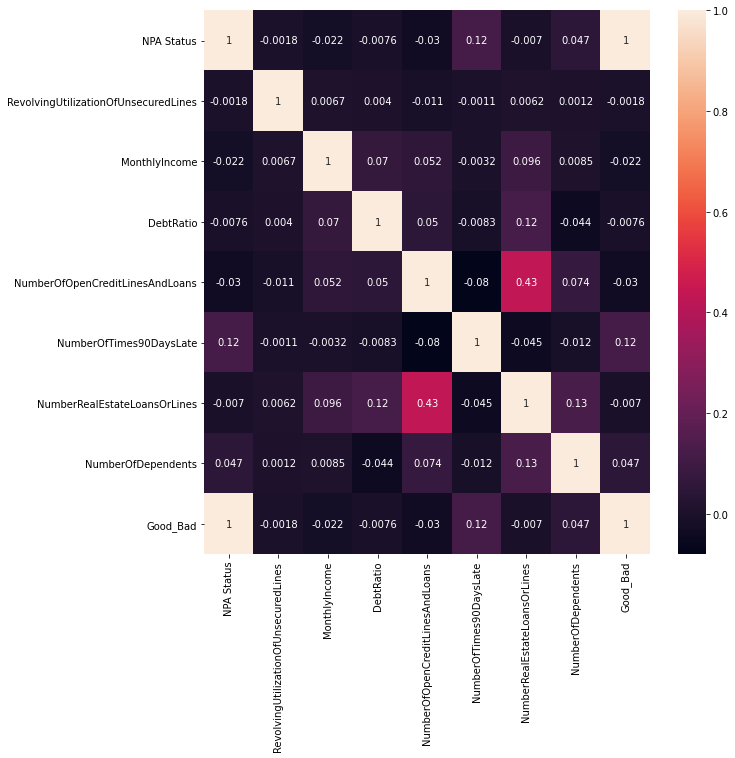

In [27]:
corr = num_data.corr()

top_features = corr.index
plt.figure(figsize=(10,10))
sns.heatmap(num_data[top_features].corr(),annot=True)

NPA Status
3.4688223830320744


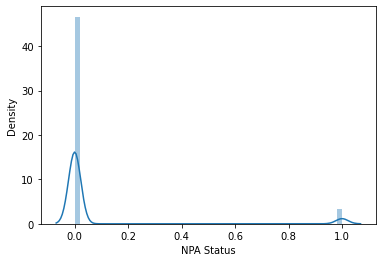

RevolvingUtilizationOfUnsecuredLines
97.63059816732675


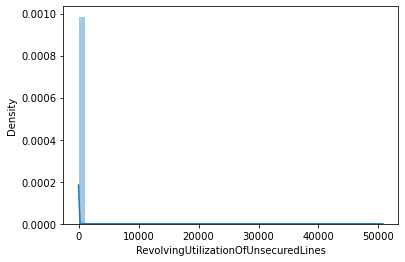

MonthlyIncome
116.88505734710233


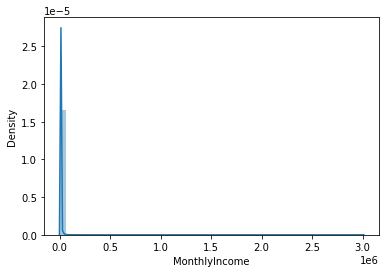

DebtRatio
95.1568412848665


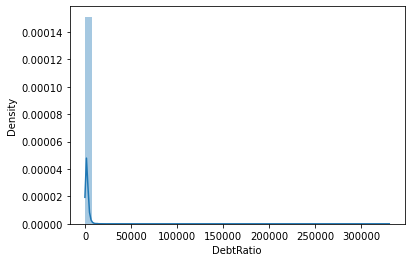

NumberOfOpenCreditLinesAndLoans
1.215301627033253


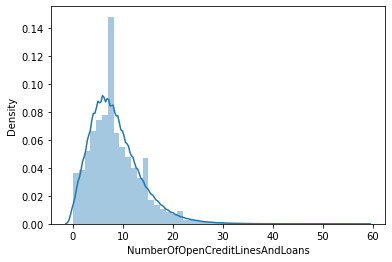

NumberOfTimes90DaysLate
23.087114597836827


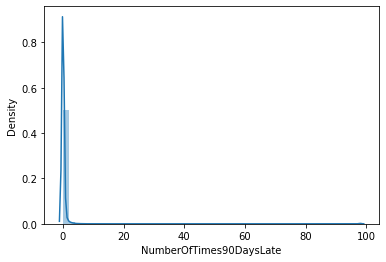

NumberRealEstateLoansOrLines
3.482449168580264


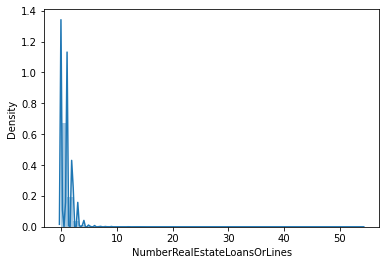

NumberOfDependents
1.6227166400752109


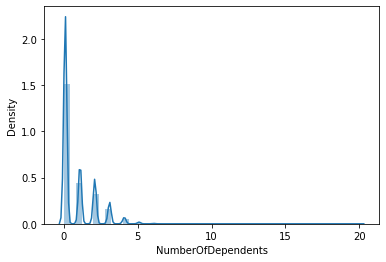

Good_Bad
3.4688223830320744


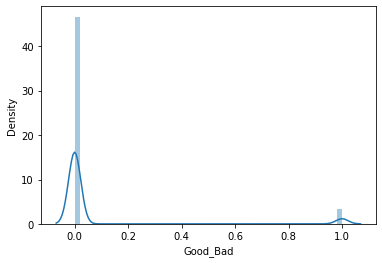

In [28]:
for col in num_data:
    print(col)
    print(skew(num_data[col]))
    
    plt.figure()
    sns.distplot(num_data[col])
    plt.show()

All the numerical columns have skewness and their correlation with target variable
is also not good. So we can applying  square root transformation to solve skewness of data.

In [29]:
num_data['RevolvingUtilizationOfUnsecuredLines']=np.sqrt(np.sqrt(num_data['RevolvingUtilizationOfUnsecuredLines'])**0.6)
num_data['MonthlyIncome']=np.sqrt(num_data['MonthlyIncome'])**0.6
num_data['NumberRealEstateLoansOrLines']=np.sqrt(num_data['NumberRealEstateLoansOrLines'])
num_data['DebtRatio']=np.sqrt(num_data['DebtRatio'])**0.13
num_data['NumberOfOpenCreditLinesAndLoans']=np.sqrt(num_data['NumberOfOpenCreditLinesAndLoans'])
num_data['NumberOfDependents']=np.sqrt(num_data['NumberOfDependents'])**0.01

In [30]:
cat_data=df.select_dtypes(include=object)
cat_data.head()

,age,Gender,Region,Rented_OwnHouse,Occupation,Education
0,Middle_Adult,Male,South,Ownhouse,Self_Emp,Matric
1,Middle_Adult,Female,South,Ownhouse,Self_Emp,Graduate
2,Middle_Adult,Female,South,Ownhouse,Self_Emp,PhD
3,Middle_Adult,Female,South,Ownhouse,Self_Emp,Professional
4,Middle_Adult,Male,South,Ownhouse,Self_Emp,Post-Grad


In [31]:
cat_data['age']=lb.fit_transform(cat_data['age'])
cat_data['Gender']=lb.fit_transform(cat_data['Gender'])
cat_data['Region']=lb.fit_transform(cat_data['Region'])
cat_data['Rented_OwnHouse']=lb.fit_transform(cat_data['Rented_OwnHouse'])
cat_data['Occupation']=lb.fit_transform(cat_data['Occupation'])
cat_data['Education']=lb.fit_transform(cat_data['Education'])
cat_data


,age,Gender,Region,Rented_OwnHouse,Occupation,Education
0,3,1,3,0,4,1
1,3,0,3,0,4,0
2,3,0,3,0,4,2
3,3,0,3,0,4,4
4,3,1,3,0,4,3
...,...,...,...,...,...,...
149995,2,1,2,0,0,4
149996,3,1,2,0,4,4
149997,3,1,2,1,2,4
149998,3,1,2,1,0,4


In [32]:
X=cat_data
Y=df['Good_Bad']

Checking relationship between categorical variables and target variable.

In [33]:
chi_scores= chi2(X,Y)
chi_scores

(array([6.60935010e+00, 1.35736842e+00, 8.57256291e+03, 7.32621097e-01,
        2.79330648e-01, 2.18863964e+02]),
 array([1.01444678e-02, 2.43994078e-01, 0.00000000e+00, 3.92034906e-01,
        5.97140270e-01, 1.60023918e-49]))

In [34]:
pvalue=pd.Series(chi_scores[1],index=X.columns)
pvalue=pvalue.sort_values(ascending=False,inplace=False)
pvalue


Occupation         5.971403e-01
Rented_OwnHouse    3.920349e-01
Gender             2.439941e-01
age                1.014447e-02
Education          1.600239e-49
Region             0.000000e+00
dtype: float64

<AxesSubplot:>

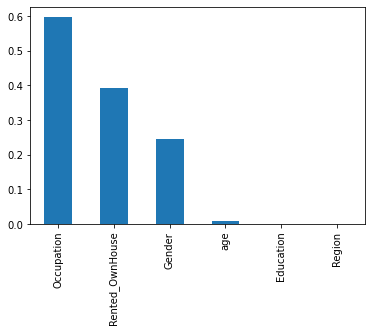

In [35]:
pvalue.plot.bar()

From the above graph "Occupation", "Rented_OwnHouse" and "Gender" variables have high p-value, so will remove it form the DataSet.

In [36]:
cat_data=cat_data.drop(['Occupation','Rented_OwnHouse','Gender'],1)
cat_data.head()


,age,Region,Education
0,3,3,1
1,3,3,0
2,3,3,2
3,3,3,4
4,3,3,3


In [37]:
final_data=pd.concat([num_data,cat_data],1)
final_data.head()


,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,age,Region,Education
0,1.0,0.960827,15.416950,0.985839,3.605551,0.0,2.44949,1.003717,1,3,3,1
1,0.0,0.993452,10.580154,0.872137,2.000000,0.0,0.00000,1.000477,0,3,3,0
2,0.0,0.939186,11.090414,0.852020,1.414214,1.0,0.00000,0.988553,0,3,3,2
3,0.0,0.804136,11.364601,0.805747,2.236068,0.0,0.00000,0.988553,0,3,3,4
4,0.0,0.985504,27.606576,0.786651,2.645751,0.0,1.00000,0.988553,0,3,3,3


DataType of all variables should be same

In [38]:
final_data=final_data.astype(int)
final_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   NPA Status                            150000 non-null  int32
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  int32
 2   MonthlyIncome                         150000 non-null  int32
 3   DebtRatio                             150000 non-null  int32
 4   NumberOfOpenCreditLinesAndLoans       150000 non-null  int32
 5   NumberOfTimes90DaysLate               150000 non-null  int32
 6   NumberRealEstateLoansOrLines          150000 non-null  int32
 7   NumberOfDependents                    150000 non-null  int32
 8   Good_Bad                              150000 non-null  int32
 9   age                                   150000 non-null  int32
 10  Region                                150000 non-null  int32
 11  Education                 

In [39]:
final_data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,MonthlyIncome,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents,Good_Bad,age,Region,Education
0,1,0,15,0,3,0,2,1,1,3,3,1
1,0,0,10,0,2,0,0,1,0,3,3,0
2,0,0,11,0,1,1,0,0,0,3,3,2
3,0,0,11,0,2,0,0,0,0,3,3,4
4,0,0,27,0,2,0,1,0,0,3,3,3


# Data imbalance

In [40]:
final_data['Good_Bad'].value_counts()


0    139974
1     10026
Name: Good_Bad, dtype: int64

<AxesSubplot:xlabel='Good_Bad', ylabel='count'>

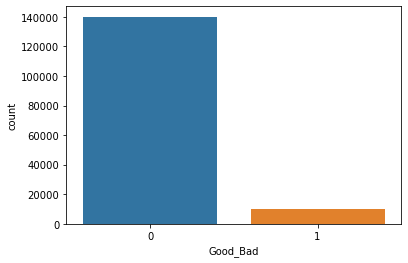

In [41]:
sns.countplot(final_data['Good_Bad'])


In [42]:
bad = final_data[final_data["Good_Bad"]==1]
good = final_data[final_data["Good_Bad"]==0]
print("Bad count:",bad.shape,"And Good count:",good.shape)

Bad count: (10026, 12) And Good count: (139974, 12)


From the above graph, it is clear that we have much unbalanced data in target variable. "Bad" is 139974 and "Good" is 10026

In [43]:
x=final_data.drop('Good_Bad',1)
y=final_data['Good_Bad']

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled= sc.fit_transform(x)
scaled

array([[ 3.73645569, -0.13916078,  0.43938043, ...,  0.6421013 ,
         0.8104916 , -0.78799287],
       [-0.26763331, -0.13916078, -1.02104742, ...,  0.6421013 ,
         0.8104916 , -1.39810225],
       [-0.26763331, -0.13916078, -0.72896185, ...,  0.6421013 ,
         0.8104916 , -0.17788349],
       ...,
       [-0.26763331, -0.13916078,  1.02355157, ...,  0.6421013 ,
         0.13195312,  1.04233527],
       [-0.26763331, -0.13916078, -0.14479071, ...,  0.6421013 ,
         0.13195312,  1.04233527],
       [-0.26763331, -0.13916078,  0.14729486, ..., -0.64587938,
         0.13195312,  1.04233527]])

In [45]:
smk = SMOTETomek(random_state=42)
x_res,y_res = smk.fit_resample(x,y)

In [46]:
x_res.shape, y_res.shape, 

((279926, 11), (279926,))

In [47]:
from collections import Counter
print("Original Dataset shape{}".format(Counter(y)))
print("Resample Dataset shape{}".format(Counter(y_res)))

Original Dataset shapeCounter({0: 139974, 1: 10026})
Resample Dataset shapeCounter({1: 139963, 0: 139963})


Initially we have target variable of 139974:10026. But after over sampling it became 139960:139960.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=42)

# Model Training
1. Naive Bayes
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. K-Neirest Neighbor

# Naive Bayes Classifier

In [49]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [50]:
y_pred=model.predict(X_test)


In [51]:
NBC=accuracy_score(y_test,y_pred)
NBC

1.0

In [52]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42020
           1       1.00      1.00      1.00      2980

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



# Logistic Regression

In [53]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred=model.predict(X_test)


In [55]:
LR=accuracy_score(y_test,y_pred)
LR

1.0

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42020
           1       1.00      1.00      1.00      2980

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



# Decision Tree Classifier

In [57]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=model.predict(X_test)


In [59]:
DTC=accuracy_score(y_test,y_pred)
DTC

1.0

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42020
           1       1.00      1.00      1.00      2980

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



# Random Forest Classifier

In [61]:
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
y_pred=model1.predict(X_test)

In [63]:
RFC=accuracy_score(y_test,y_pred)
RFC

1.0

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42020
           1       1.00      1.00      1.00      2980

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



# K-Neighbors Classifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=20)

In [66]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [67]:
y_test_pred = knn.predict(X_test)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
KNC=accuracy_score(y_test, y_test_pred)*100
KNC

97.36222222222221

In [69]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     42020
           1       0.97      0.62      0.76      2980

    accuracy                           0.97     45000
   macro avg       0.97      0.81      0.87     45000
weighted avg       0.97      0.97      0.97     45000



In [70]:
pd.DataFrame({"Classifier":["Naive Bayes Classifier","Logistic Regression","Decision Tree Classifier","Random Forest Classifier"
                            ,"K-Neighbors Classifier"],"Accuracy":[NBC,LR,DTC,RFC,KNC]})

,Classifier,Accuracy
0,Naive Bayes Classifier,1.000000
1,Logistic Regression,1.000000
2,Decision Tree Classifier,1.000000
3,Random Forest Classifier,1.000000
4,K-Neighbors Classifier,97.362222
